In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import seaborn as sns
import plotly.express as px
sns.set()

In [2]:
file_path = '1.supermarket_sales.csv' 
df = pd.read_csv(file_path)

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [5]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [6]:
print("\nBasic statistical details:")
print(df.describe())


Basic statistical details:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                

In [7]:
#Extracting date information into Day,Month,Year
def split_date(data):
    data['Date']=pd.to_datetime(data['Date'])
    data['Year']=data.Date.dt.year
    data['Month']=data.Date.dt.month
    data['Day']=data.Date.dt.day

In [8]:
#Spliting our date data into day ,month and year
split_date(df)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8


In [9]:
df.Year.value_counts()

2019    1000
Name: Year, dtype: int64

In [10]:
df.Month.value_counts()

1    352
3    345
2    303
Name: Month, dtype: int64

In [11]:
print(df['Gender'].count())
#Get total numbe of customers per their Gender Male of female
df['Gender'].value_counts()

1000


Female    501
Male      499
Name: Gender, dtype: int64

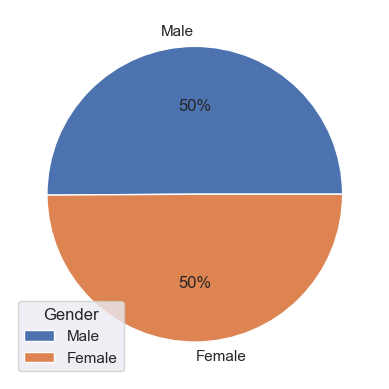

In [12]:
gender=df.Gender.value_counts()
gender_labels=['Male','Female']
plt.pie(gender,labels=gender_labels,autopct='%.0f%%')
plt.legend(title='Gender')
plt.show()

In [13]:
df[['Gender','Payment']].value_counts(ascending=True).to_dict()

{('Male', 'Credit card'): 148,
 ('Female', 'Ewallet'): 160,
 ('Female', 'Credit card'): 163,
 ('Male', 'Cash'): 166,
 ('Female', 'Cash'): 178,
 ('Male', 'Ewallet'): 185}

In [14]:
paymentcounts=df['Payment'].value_counts().to_dict()
nw=pd.DataFrame(list(paymentcounts.items()),columns=['Payment','Counts'])
nw

,Payment,Counts
0,Ewallet,345
1,Cash,344
2,Credit card,311


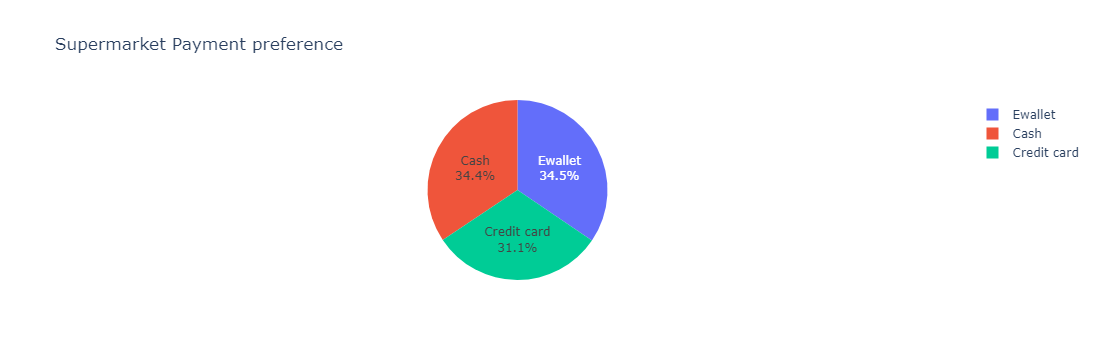

In [15]:
payment_fig=px.pie(nw,values='Counts',names='Payment',title='Supermarket Payment preference',labels='Payment')
payment_fig.update_traces(textposition='inside',textinfo='percent+label')
payment_fig.show()

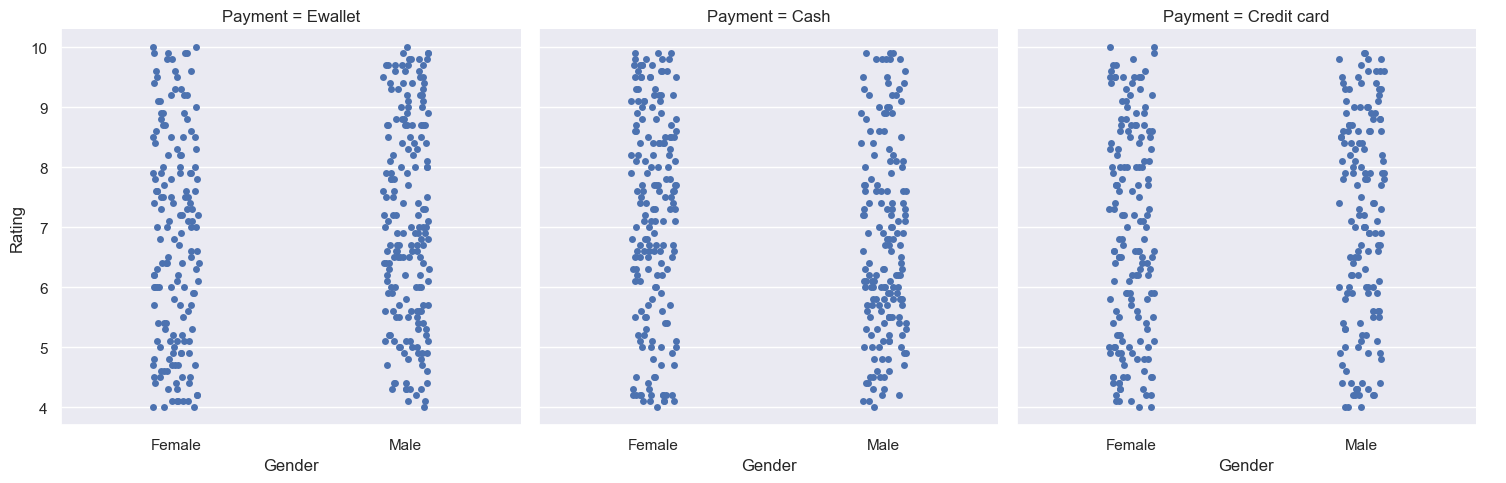

In [16]:
sns.catplot(x='Gender',y='Rating',col='Payment',data=df)
plt.show()

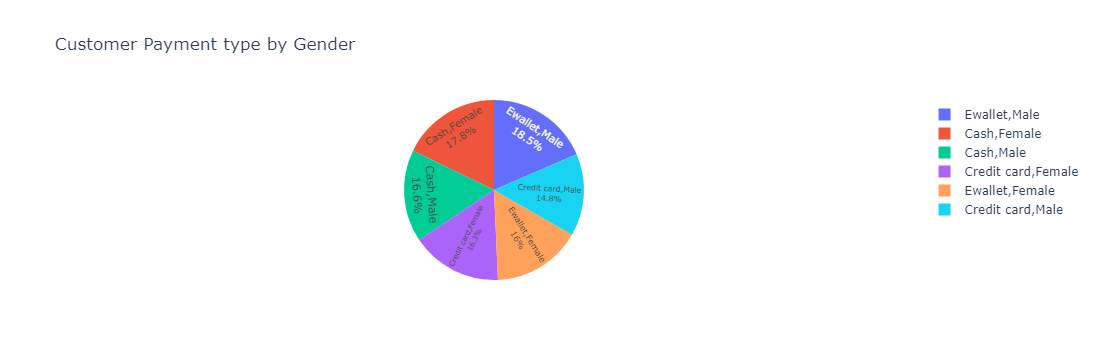

In [17]:
gender_payment=df[['Payment','Gender']].value_counts().to_dict()
df_genderpayment=pd.DataFrame(list(gender_payment.items()),columns=['Payment','Gender'])
gender_paymentfig=px.pie(df_genderpayment,values='Gender',names='Payment',title='Customer Payment type by Gender',labels='Payment')
gender_paymentfig.update_traces(textposition='inside',textinfo='percent+label')
gender_paymentfig.show()

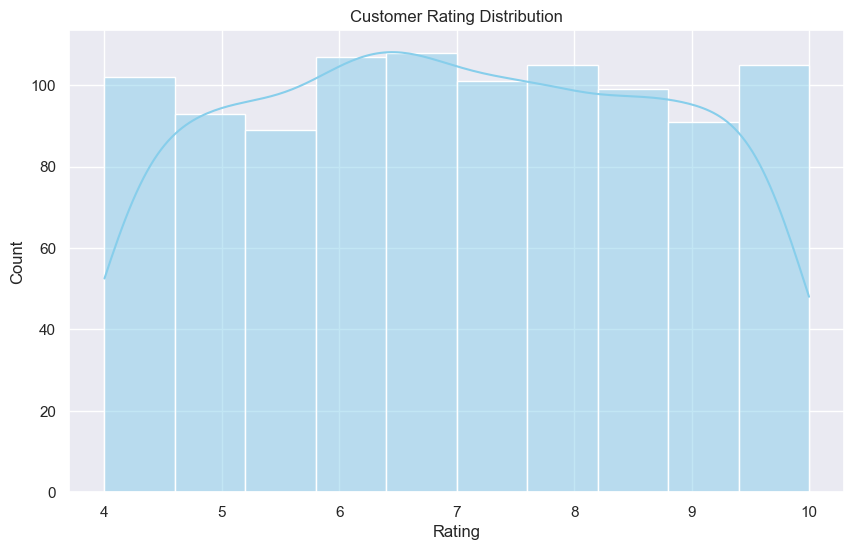

In [18]:
# 1 Customer Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


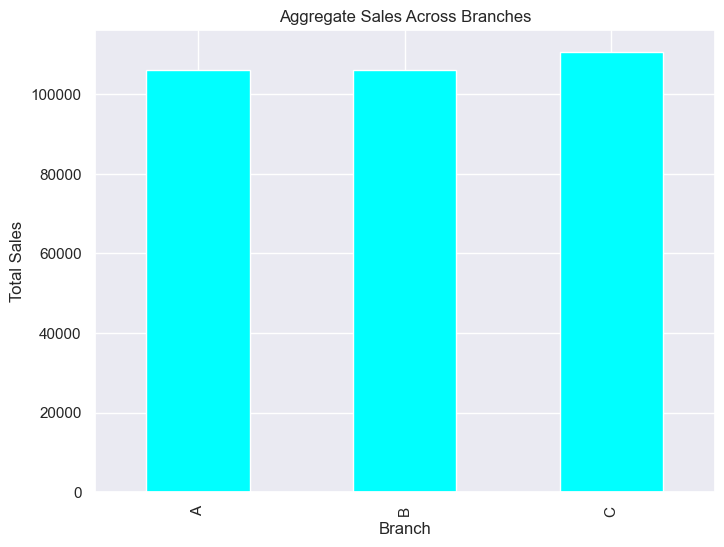

In [19]:
# Aggregate Sales Across Branches
aggregatesales = df.groupby('Branch')['Total'].sum()
print(aggregatesales)
plt.figure(figsize=(8, 6))
aggregatesales.plot(kind='bar', color=['aqua'])
plt.title('Aggregate Sales Across Branches')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

In [20]:
# Bi-Variate Analysis

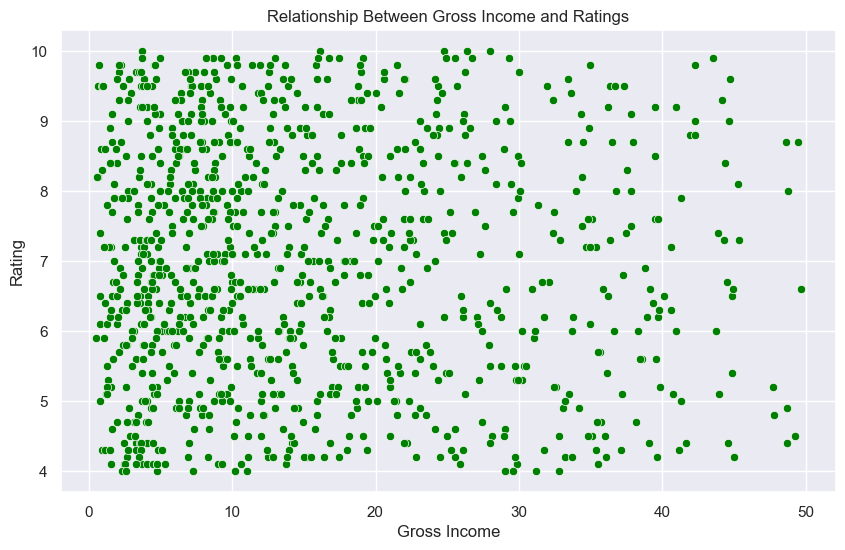

In [21]:
# Relationship Between Gross Income and Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gross income', y='Rating', data=df, color='green')
plt.title('Relationship Between Gross Income and Ratings')
plt.xlabel('Gross Income')
plt.ylabel('Rating')
plt.show()


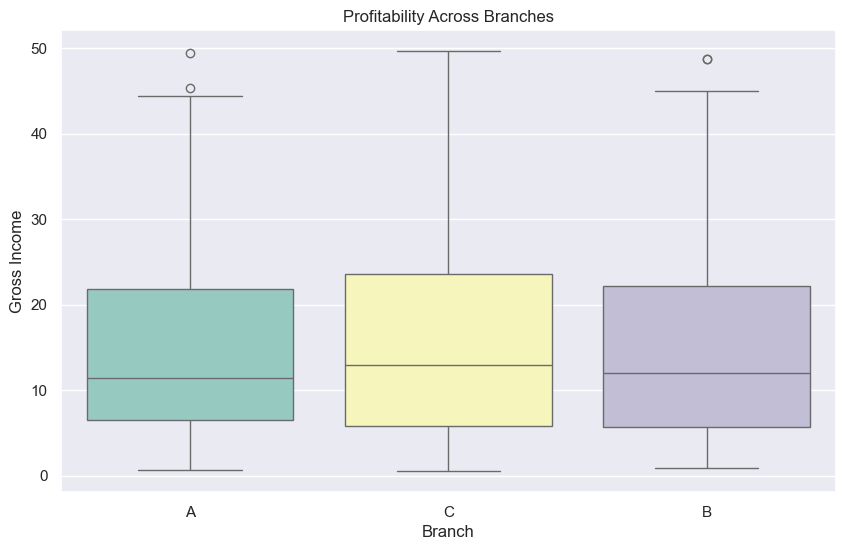

In [22]:
# Profitability Across Branches
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch', y='gross income', data=df, hue='Branch', palette='Set3', legend=False)
plt.title('Profitability Across Branches')
plt.xlabel('Branch')
plt.ylabel('Gross Income')
plt.show()


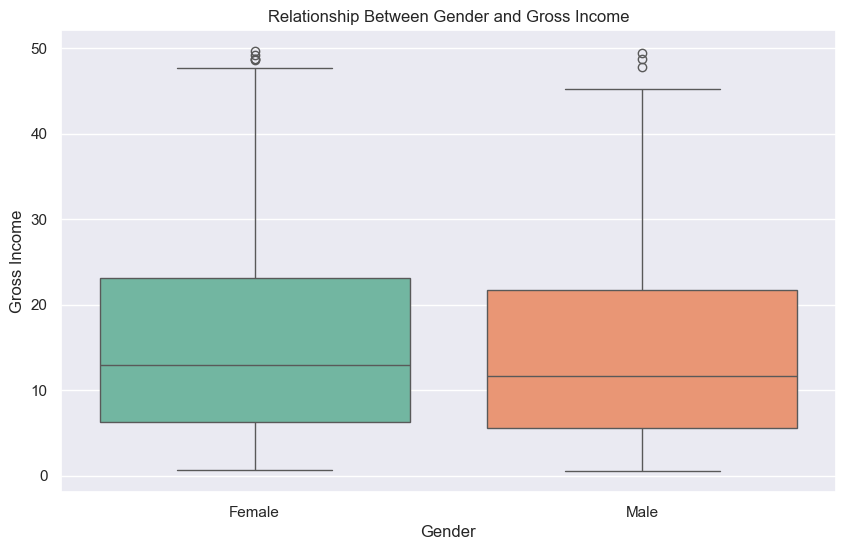

In [23]:
# Relationship Between Gender and Gross Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='gross income', data=df, hue='Gender', palette='Set2', legend=False)
plt.title('Relationship Between Gender and Gross Income')
plt.xlabel('Gender')
plt.ylabel('Gross Income')
plt.show()


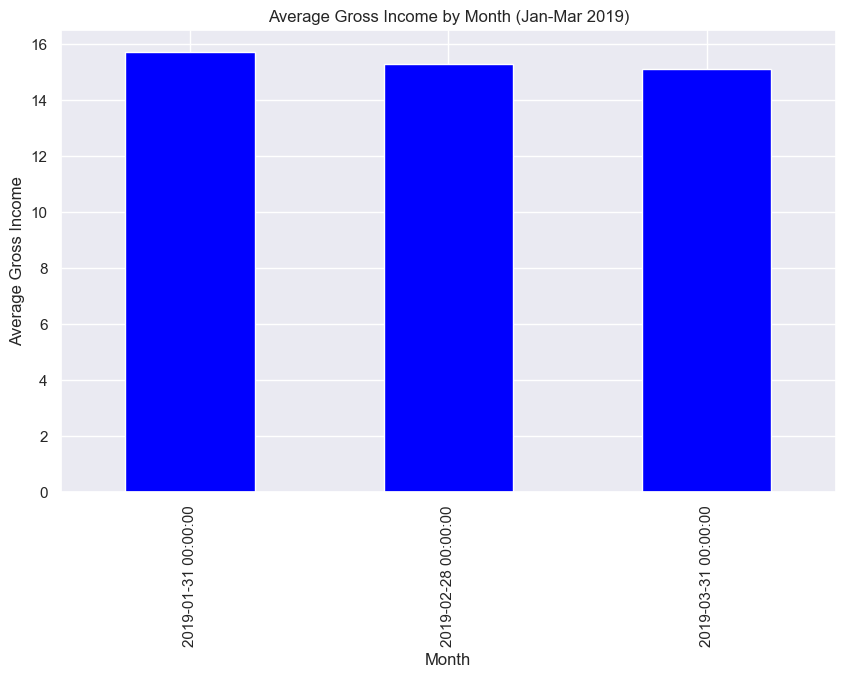

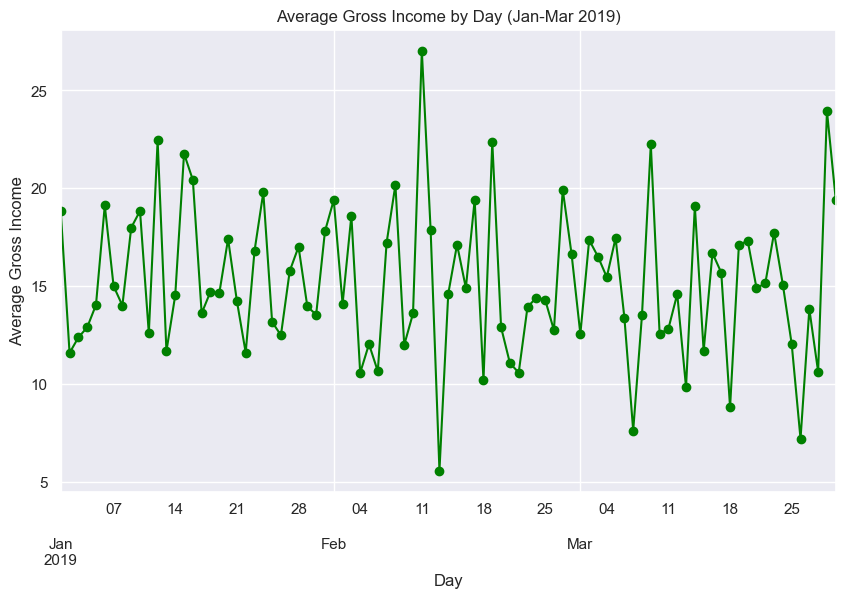

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
data_2019 = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month.isin([1, 2, 3]))]
data_2019.set_index('Date', inplace=True)
income_by_month = data_2019['gross income'].resample('M').mean()
income_by_day_2019 = data_2019['gross income'].resample('D').mean()
plt.figure(figsize=(10, 6))
income_by_month.plot(kind='bar', color='blue')
plt.title('Average Gross Income by Month (Jan-Mar 2019)')
plt.xlabel('Month')
plt.ylabel('Average Gross Income')
plt.show()
plt.figure(figsize=(10, 6))
income_by_day_2019.plot(kind='line', marker='o', color='green')
plt.title('Average Gross Income by Day (Jan-Mar 2019)')
plt.xlabel('Day')
plt.ylabel('Average Gross Income')
plt.show()


Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64


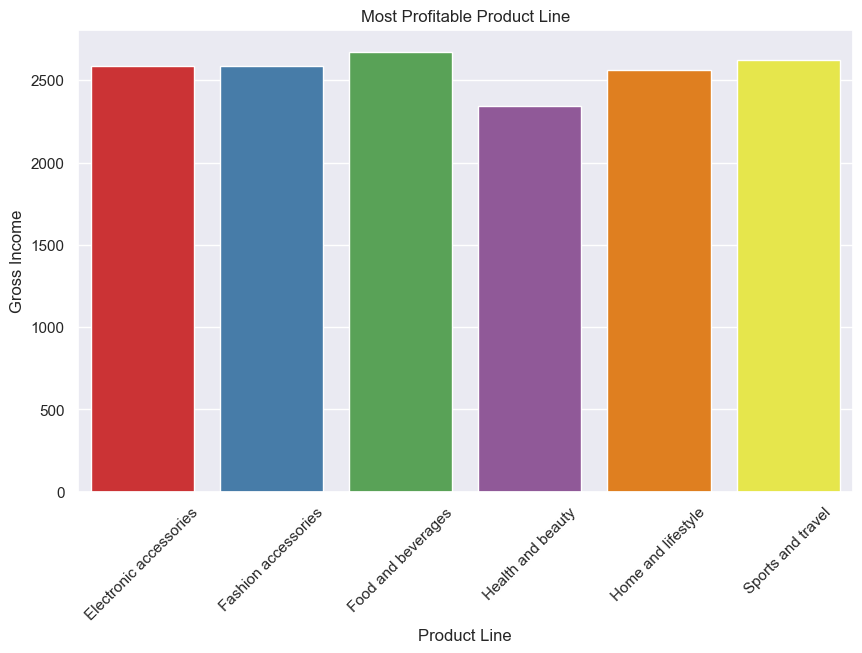

In [25]:
# Most profitable product line
total_gross_income_by_product_line = df.groupby('Product line')['gross income'].sum()
print(total_gross_income_by_product_line)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_gross_income_by_product_line.index, y=total_gross_income_by_product_line.values, hue=total_gross_income_by_product_line.index, legend=False, palette='Set1')
plt.title('Most Profitable Product Line')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)
plt.show()

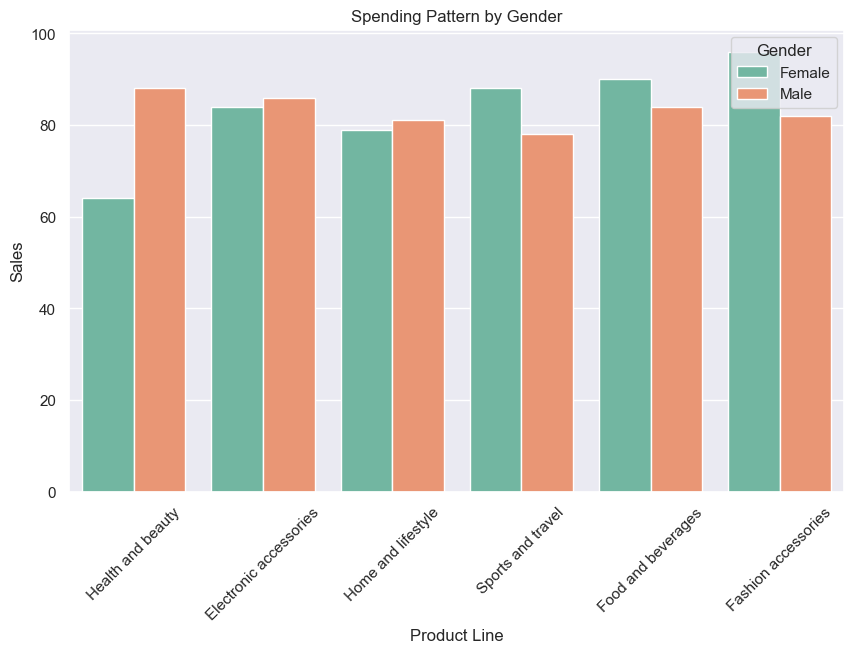

In [26]:
# Spending Pattern by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Product line', hue='Gender', data=df, palette='Set2')
plt.title('Spending Pattern by Gender')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


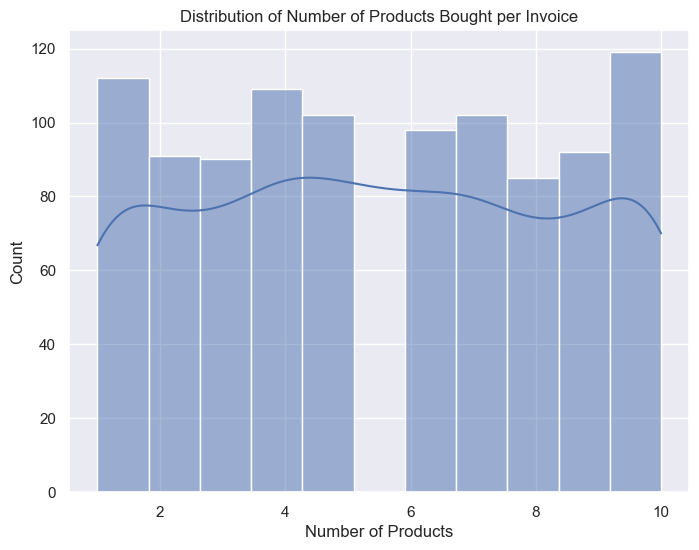

In [27]:
#Distribution of Number of Products Bought per Invoice
product = df.groupby(['Invoice ID', 'Product line'])['Quantity'].sum().reset_index()
product = product.groupby('Invoice ID')['Quantity'].sum()
plt.figure(figsize=(8, 6))
sns.histplot(data=product, kde=True)
plt.title('Distribution of Number of Products Bought per Invoice')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

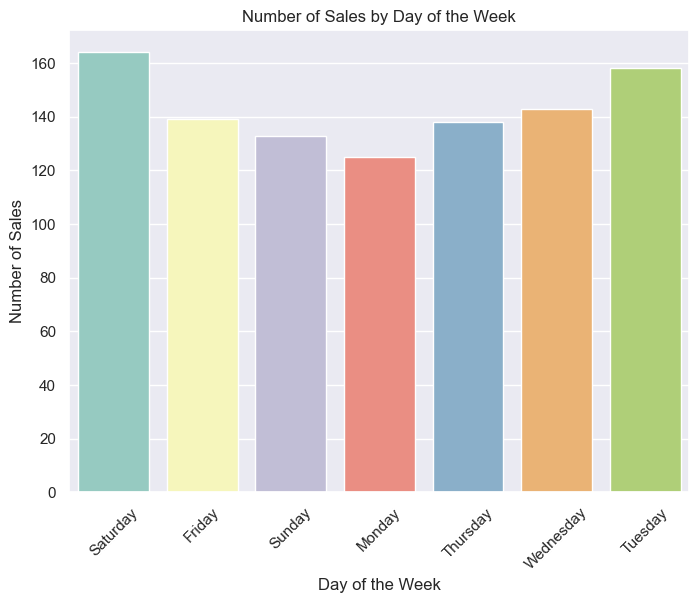

In [28]:
# Day of the Week with Maximum Sales
date = pd.to_datetime(df['Date'])
week = date.dt.day_name()
plt.figure(figsize=(8, 6))
sns.countplot(x=week,hue=week,legend=False, palette='Set3')  
plt.title('Number of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
dtype: int64


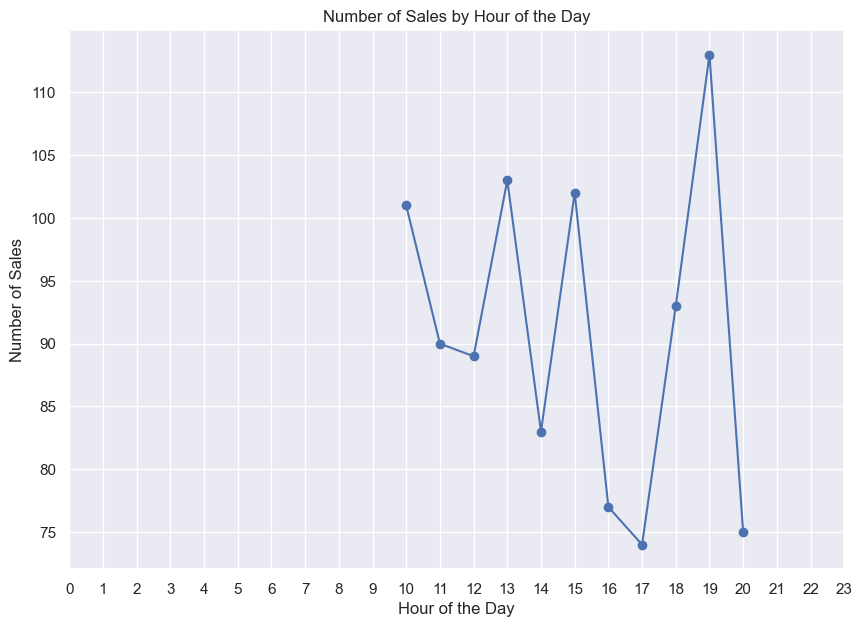

In [29]:
#Busiest Hour of the Day
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour
hourly = df.groupby('hour').size()
print(hourly)
plt.figure(figsize=(10, 7))
hourly.plot(kind='line', marker='o')
plt.title('Number of Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.xticks(range(0, 24))  
plt.grid(True)  
plt.show()

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


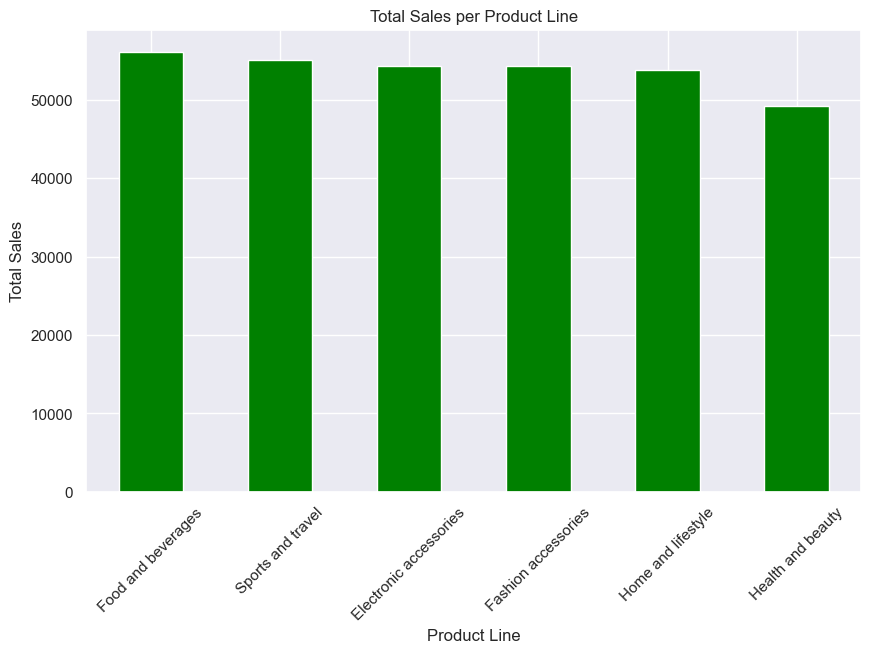

In [30]:
#Total sales per product line
tf=df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
print(tf)
plt.figure(figsize=(10, 6))
tf.plot(kind='bar', color='green')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Line')
plt.xticks(rotation=45)
plt.show()

City       Product line          
Mandalay   Electronic accessories     811.9735
           Fashion accessories        781.5865
           Food and beverages         724.5185
           Health and beauty          951.4600
           Home and lifestyle         835.6745
           Sports and travel          951.8190
Naypyitaw  Electronic accessories     903.2845
           Fashion accessories       1026.6700
           Food and beverages        1131.7550
           Health and beauty          791.2060
           Home and lifestyle         661.6930
           Sports and travel          750.5680
Yangon     Electronic accessories     872.2435
           Fashion accessories        777.7385
           Food and beverages         817.2905
           Health and beauty          599.8930
           Home and lifestyle        1067.4855
           Sports and travel          922.5095
Name: gross income, dtype: float64


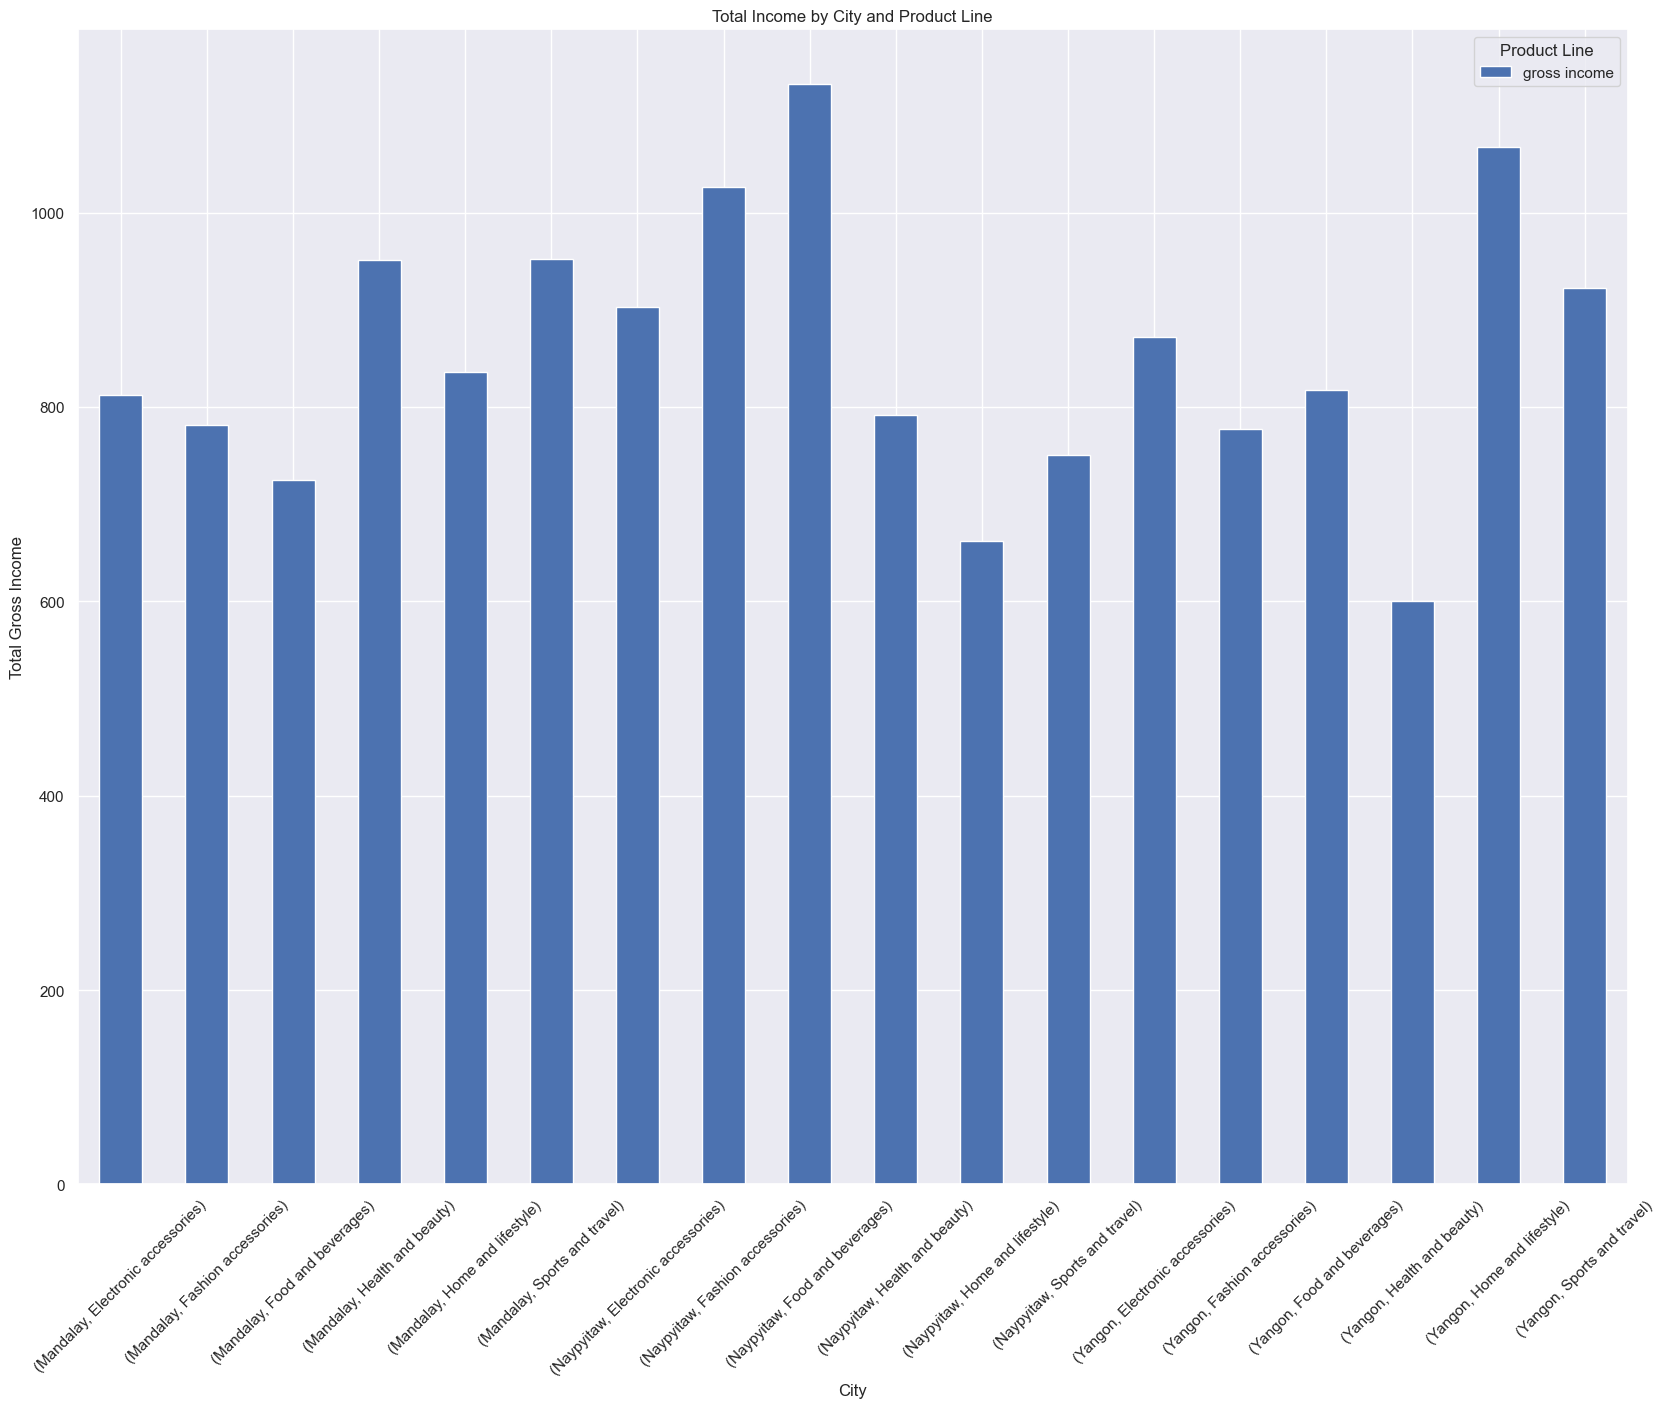

In [31]:
#Total Income by City and Product Line
tp = df.groupby(['City', 'Product line'])['gross income'].sum()
print(tp)
plt.figure(figsize=(20, 15))
tp.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Total Gross Income')
plt.title('Total Income by City and Product Line')
plt.xticks(rotation=45)
plt.legend(title='Product Line')
plt.show()